# Ottawa, Canada Downburst 27 September 2017

This notebook plots RAP model and radar reflectivity data for the 27 September 2017 Ottawa, Canada downburst.

In [1]:
%matplotlib inline


odict_keys(['Reflectivity', 'time', 'y', 'x', 'LambertConformal', 'lat', 'lon'])
Z shape (1161, 1029) [[-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 [-214718.359375 -214718.359375 -214718.359375 ..., -214718.359375
  -214718.359375 -214718.359375]
 ..., 
 [-292420.53125  -292420.53125  -292420.53125  ..., -214718.359375
  -214718.359375 -214718.359375]
 [-292420.53125  -292420.53125  -292420.53125  ..., -214718.359375
  -214718.359375 -214718.359375]
 [-292420.53125  -292420.53125  -292420.53125  ..., -214718.359375
  -214718.359375 -214718.359375]]
X shape, Y shape (1029,) (1161,)
lats shape, lons shape (1161, 1029) (1161, 1029)
Z_pos shape (1161, 1029) [[ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.47183594  21.47183594  21.47183594 ...,  21.47183594  21.47183594
   21.47183594]
 [ 21.4

/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((1161, 1029), -1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


244287.35516224403 367837.08604498487


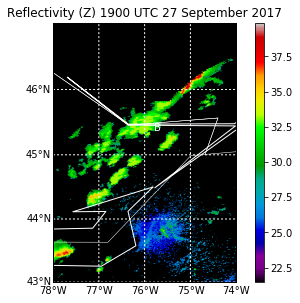

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

def read_Z_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, X, Y, lats, lons, names

Z_file = 'Level3_Composite_n0r_1km_20170927_1900.nc4'
Z, X, Y, lats, lons, names = read_Z_plot(Z_file)
Z= Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)
makepos = np.full((1161,1029),-1)
Z_pos = np.multiply(Z,makepos)
Z_pos = Z_pos/10000
print('Z_pos shape', Z_pos.shape, Z_pos)

# CREATE A MAP

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=43,urcrnrlat=47,llcrnrlon=-78,urcrnrlon=-74) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,Z_pos,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(43.,48.,1.),labels=[True,False,False,False],color="white")
m.drawmeridians(np.arange(-78.,-73.,1.),labels=[False,False,False,True],color="white")
m.drawcoastlines(color="white")
m.drawcountries(color="white")
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data', color="white")
m.drawstates(color="white")
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('Reflectivity (Z) 1900 UTC 27 September 2017')
plt.savefig("Z_0927_1900.png",dpi=500,bbox_inches='tight')
plt.show()

# RAP MWPI 1800 UTC 27 September 2017

odict_keys(['Geopotential_height_isobaric', 'time1', 'isobaric', 'y', 'x', 'LambertConformal_Projection', 'lat', 'lon', 'Relative_humidity_isobaric', 'Temperature_isobaric'])
Z_750 shape (96, 75) [[2586.48974609375 2585.86474609375 2585.08349609375 ..., 2550.92724609375
  2552.05224609375 2553.20849609375]
 [2586.67724609375 2586.08349609375 2585.33349609375 ..., 2553.39599609375
  2554.45849609375 2555.52099609375]
 [2586.77099609375 2586.27099609375 2585.58349609375 ..., 2555.58349609375
  2556.52099609375 2557.55224609375]
 ..., 
 [2381.83349609375 2381.55224609375 2381.55224609375 ..., 2455.11474609375
  2455.92724609375 2456.77099609375]
 [2380.64599609375 2380.39599609375 2380.36474609375 ..., 2453.39599609375
  2454.20849609375 2454.98974609375]
 [2379.55224609375 2379.33349609375 2379.27099609375 ..., 2451.70849609375
  2452.45849609375 2453.14599609375]]
RH_750 shape (96, 75) [[68.18854522705078 68.81354522705078 68.18854522705078 ...,
  69.43854522705078 69.06354522705078 68.

/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/home002/kpryor/miniconda3/envs/project_1/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


466677.1037316064 813367.3460701555


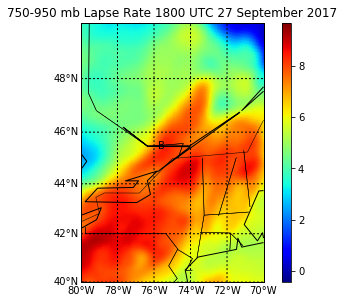

466677.1037316064 813367.3460701555


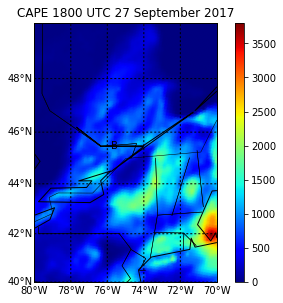

466677.1037316064 813367.3460701555


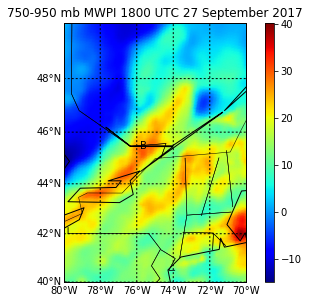

466677.1037316064 813367.3460701555


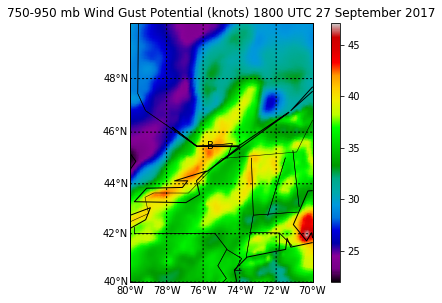

466677.1037316064 813367.3460701555


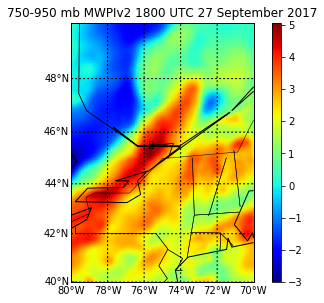

466677.1037316064 813367.3460701555


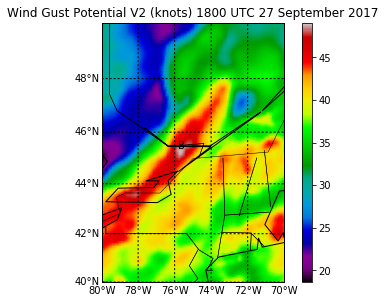

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

def read_RAP_750(ncf):
    nc_fid = Dataset(ncf, 'r')

    Z_750 = nc_fid.variables["Geopotential_height_isobaric"][:]  # shape lat, lon as shown above
    RH_750 = nc_fid.variables["Relative_humidity_isobaric"][:]
    T_750 = nc_fid.variables["Temperature_isobaric"][:]
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z_750, RH_750, T_750, X, Y, lats, lons, names

def read_RAP_950(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z_950 = nc_fid.variables["Geopotential_height_isobaric"][:]  # shape lat, lon as shown above
    RH_950 = nc_fid.variables["Relative_humidity_isobaric"][:]
    T_950 = nc_fid.variables["Temperature_isobaric"][:]
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z_950, RH_950, T_950, X, Y, lats, lons, names

def read_RAP_CAPE(ncf):
    nc_fid = Dataset(ncf, 'r')
    CAPE = nc_fid.variables["Convective_available_potential_energy_surface"][:]  # shape lat, lon as shown above
    X = nc_fid.variables["x"][:]
    Y = nc_fid.variables["y"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return CAPE, X, Y, lats, lons, names

RAP_file_750 = 'RR_CONUS_13km_20170927_1800_750.nc4'
names = read_RAP_750(RAP_file_750)
Z_750, RH_750, T_750, X, Y, lats, lons, names = read_RAP_750(RAP_file_750)
Z_750 = Z_750[0,0,:,:]
Z_750_km = Z_750/1000
RH_750 = RH_750[0,0,:,:]
T_750 = T_750[0,0,:,:]
T_750_C = T_750 - 273.15
#TD_650 = T_650_C - ((100-RH_650)/5)
TD_750 = ((0.198 + (0.0017*T_750_C))*RH_750) + ((0.84*T_750_C)-19.2)
print(names)
print('Z_750 shape', Z_750.shape, Z_750)
print('RH_750 shape', RH_750.shape, RH_750)
print('T_750 shape', T_750.shape, T_750)
print('T_750_C shape', T_750_C.shape, T_750_C)
print('TD_750 shape', TD_750.shape, TD_750)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

RAP_file_950 = 'RR_CONUS_13km_20170927_1800_950.nc4'
names = read_RAP_950(RAP_file_950)
Z_950, RH_950, T_950, X, Y, lats, lons, names = read_RAP_950(RAP_file_950)
Z_950 = Z_950[0,0,:,:]
Z_950_km = Z_950/1000
RH_950 = RH_950[0,0,:,:]
T_950 = T_950[0,0,:,:]
T_950_C = T_950 - 273.15
#TD_650 = T_650_C - ((100-RH_650)/5)
TD_950 = ((0.198 + (0.0017*T_950_C))*RH_950) + ((0.84*T_950_C)-19.2)
print(names)
print('Z_950 shape', Z_950.shape, Z_950)
print('RH_950 shape', RH_950.shape, RH_950)
print('T_950 shape', T_950.shape, T_950)
print('T_950_C shape', T_950_C.shape, T_950_C)
print('TD_950 shape', TD_950.shape, TD_950)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

RAP_file_CAPE = 'RR_CONUS_13km_20170927_1800_CAPE.nc4'
names = read_RAP_CAPE(RAP_file_CAPE)
CAPE, X, Y, lats, lons, names = read_RAP_CAPE(RAP_file_CAPE)
CAPE = CAPE[0,:,:]
print(names)
print('CAPE shape', CAPE.shape, CAPE)
print('X shape, Y shape', X.shape, Y.shape)
print('lats shape, lons shape', lats.shape, lons.shape)

def MWPI(Z_750_km, Z_950_km, T_750_C, T_950_C, TD_750, TD_950, CAPE):
        gamma = (T_950_C - T_750_C)/(Z_750_km - Z_950_km)
        DD_750 = T_750_C - TD_750
        DD_950 = T_950_C - TD_950
        DDD = DD_950 - DD_750
        MWPI = (CAPE/100) + gamma + DDD
        MWPIv2 = (CAPE/1000) + (gamma/5) + (DDD/5)
        #WGP = (0.3163 * (MWPI+Tv_c)) + 33.766
        WGP = (0.4553 * MWPI) + 28.769
        WGPv2 = (3.775 * MWPIv2) + 29.9639
        return gamma, MWPI, MWPIv2, WGP, WGPv2
gamma, MWPI, MWPIv2, WGP, WGPv2 = MWPI(Z_750_km, Z_950_km, T_750_C, T_950_C, TD_750, TD_950, CAPE)
print('gamma shape', gamma.shape, gamma)
print('MWPI shape', MWPI.shape, MWPI)
print('WGP shape', WGP.shape, WGP)
print('MWPIv2 shape', MWPIv2.shape, MWPIv2)
print('WGPv2shape', WGPv2.shape, WGPv2)

# CREATE A MAP

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,gamma,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb Lapse Rate 1800 UTC 27 September 2017')
plt.savefig("gamma_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,CAPE,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('CAPE 1800 UTC 27 September 2017')
plt.savefig("CAPE_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,MWPI,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb MWPI 1800 UTC 27 September 2017')
plt.savefig("MWPI_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,WGP,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb Wind Gust Potential (knots) 1800 UTC 27 September 2017')
plt.savefig("WGP_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,MWPIv2,shading='gouraud',cmap=plt.cm.jet,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('750-950 mb MWPIv2 1800 UTC 27 September 2017')
plt.savefig("MWPIv2_0927_1800.png",dpi=500)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-80,urcrnrlon=-70) # other options include "cyl" projection
m.drawmapboundary(fill_color='0.0')
im1 = m.pcolormesh(lons,lats,WGPv2,shading='gouraud',cmap=plt.cm.nipy_spectral,latlon=True) # shading can also be "flat"
m.drawparallels(np.arange(40.,52.,2.),labels=[True,False,False,False])
m.drawmeridians(np.arange(-80.,-68.,2.),labels=[False,False,False,True])
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lon = -75.80307
lat = 45.37165
x, y = m(lon,lat)
print(x,y)
plt.annotate('B', xy=(x, y), xycoords='data', xytext=(x, y), textcoords='data')
cb = m.colorbar(im1,"right", size="5%", pad="10%")
ax.set_title('Wind Gust Potential V2 (knots) 1800 UTC 27 September 2017')
plt.savefig("WGPv2_0927_1800.png",dpi=500)
plt.show()
